Welcome to this short tutorial on how to make interactive graphs to help with your protein unfolding analysis. When I did BIOC0029, some of my unfolding data was absolutely <b>horrendous</b> which made it really, really hard to find the right parameters to fit a curve to. Being able to instantly see the effect of changing the inital parameters was rather useful for my final project and is actually quite easy to code up. This notebok will take you through the steps to make simple interactive plots to make finding inital parameters a piece of cake.


## Step 1: Install ```ipywidgets``` (The boring bit)

Interactive plots are made using the ```ipywidgets``` package. This pack should come pre-installed with anaconda. To check if it's installed, run the cell below.

In [2]:
import ipywidgets
from ipywidgets import interactive, FloatSlider,FloatText
print(ipywidgets.__version__)

8.0.4


If the cell runs and prints a number, good!, `ipywidgets` is already installed and you can go to part 2. The number shown by `print(ipywidgets.__version__)` is the current version of `ipywidgets` (kind of obivous when you think about it) and can be updated by the steps below. As of writing, the latest release is version 8.0.4.

if you get a ModuleNotFoundError (seen below) or want to update, you will have to install `ipywidgets`. The installation process can also be used to update the package.

![Python](error.PNG)

To install `ipywidgets`, open anaconda navigator and launch CMD.exe Prompt (highlighted below). When it opens, type `conda install -c anaconda ipywidgets` in and hit enter. This will begin the installation process. Let it run, then restart anaconda. Now you should be able to import `ipywidgets`.

![Python](anaconda.png)

## Step 2: Seeing the data

Aren't you glad that's over? Now that `ipywidgets` is installed, we can start making interactive plots. First we do the standard package imports and define the function for 2-state chemical unfolding.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats

from ipywidgets import interactive, FloatSlider,FloatText

temp = 25
def chemical_unfold(x, yn, mn, yu, mu, DGu, m):
    
    return ((yn + mn * x) + (yu + mu * x) * np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp))))) / (1 + np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp)))))

Now we import my data and plot it. We will also overlay the output of the 2-state unfolding function using the inital guesses of an $m$-value around -5 kJ mol$^{-1}$ K$^{-1}$ and a $\Delta G^0_u(0)$-value around 20 kJ mol$^{−1}$.

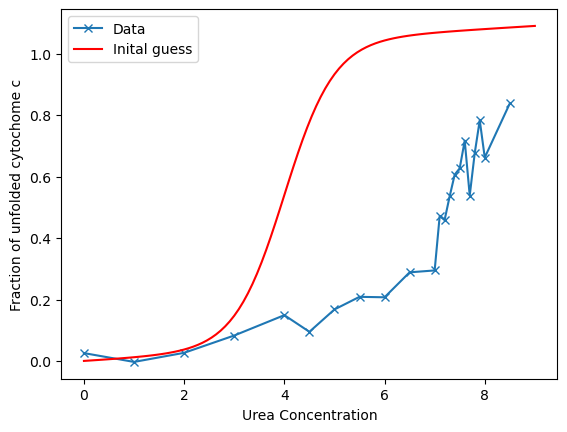

In [5]:
df_chem = pd.read_csv('clean_phos_data_chem.csv')
urea_conc = df_chem.iloc[:,0].to_numpy() # Concentration of urea
signal_chem = df_chem.iloc[:,1].to_numpy() # Fraction of unfolded cytochome c at the urea concentration

plt.plot(urea_conc,signal_chem, marker = 'x',label = 'Data')
plt.xlabel('Urea Concentration')
plt.ylabel('Fraction of unfolded cytochome c')

xin = np.linspace(0,9,100)
plt.plot(xin, chemical_unfold(xin, 0,0.01,1,0.01,20000,-5000), color="red",label='Inital guess')
plt.legend()

Ouch. Pretty ugly data, wouldn't you say? With data like this, if you get a bad inital estimate, scipy's `curve_fit` will end up with a very poor fit that gives wildly useless parameters. Below you can see using the inital guess gives $\Delta G^0_u(0)$ as far too high.

delta G = 219.564 kJ mol^-1


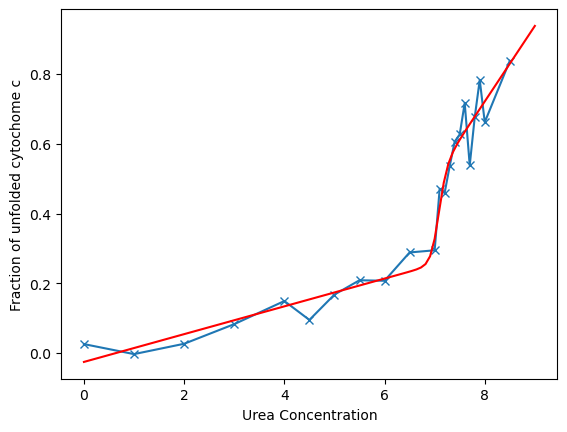

In [6]:
params, params_covariance = curve_fit(chemical_unfold, urea_conc, signal_chem, [0,0.01,1,0.01,20000,-5000])
plt.plot(urea_conc,signal_chem, marker = 'x')
plt.xlabel('Urea Concentration')
plt.ylabel('Fraction of unfolded cytochome c')

xin = np.linspace(0,9,100)
plt.plot(xin, chemical_unfold(xin, *params), color="red",label='Fit')
print("delta G =" , round(params[-2])/1000,"kJ mol^-1")

## Step 3: Defining a ploting function

To make a plot interactive, we need to encapsulate the code to make the plot inside a function. The `global` keyword tells the funtion to look for `signal_chem` and `urea_conc` outside of the function, so we do not need to give them as arguments

In [9]:
def plot_phos(yn, mn, yu, mu, DGu, m):
    global urea_conc,signal_chem
    xin = np.linspace(0,9,100)
    inital_params = [yn, mn, yu, mu, DGu, m]
    plt.plot(urea_conc,signal_chem)
    plt.plot(xin,chemical_unfold(xin,*inital_params),color = 'red')

In [10]:
# If you want, use this cell to test the plot_phos function, using inital params of your choice

## Step 4: Making sliders

To make the sliders, we use the `FloatSlider` function we imported from `ipywidgets` to make slider objects. The slider for the yn argument is seen below.

In [11]:
yn_widget = FloatSlider(min=-2,max=2,step=0.01,value=0)
yn_widget

FloatSlider(value=0.0, max=2.0, min=-2.0, step=0.01)

Here we use `min` and `max` to set the lowest and highest value the slider can go. `step` sets the minimum increment the slider can move, and `value` is the starting point of the slider when first loaded.

In [12]:
#Use this cell to make a slider for the mn argument!

Hence we can make set of slder for every parameter of the chemical unfolding equation. 

In [13]:
yn_widget = FloatSlider(min=-0,max=1,step=0.01,value=0)
mn_widget = FloatSlider(min=-2,max=2,step=0.01,value=0.01)
yu_widget = FloatSlider(min=-0,max=1,step=0.01,value=1)
mu_widget = FloatSlider(min=-2,max=2,step=0.01,value=0.01)
DGu_widget = FloatSlider(min=0,max=100000,step=100,value=20000)
m_widget = FloatSlider(min=-10000,max=10000,step=100,value=-5000)

## Step 5: Making your interactive plot! 

For the (thankfully) final step, we call the `interactve` function from `ipywidgets`.  `interactve` takes the ploting funtion we defined in step 3 as the first argument. We then give `interactive` the arguments of our plotting function <b>making sure to specify the name of each argument! </b>. This looks something like: `interactive(plot_phos, yn = 0, mn = 0.01, yu = 1,...`. Now for the magic part: we use the siders we made in step 4 as the values of yn,mn,yu(and so on) to create a plot with alterable values.

In [14]:
interactive(plot_phos, yn = yn_widget, mn = mn_widget, yu = yu_widget, mu = mu_widget, 
            DGu = DGu_widget, m = m_widget)

interactive(children=(FloatSlider(value=0.0, description='yn', max=1.0, step=0.01), FloatSlider(value=0.01, de…

And <i>voilà!</i>, you've just made your very first interactive plot!. Try playing with the sliders to get the best fit. Granted, for this data you should also set bounds for `curve_fit` but thats not the point of this notebook. Now you should be able to produce interactive plots for your own data, which hopefully will be useful to those of you studing protein unfolding for your final project. As practice I've included some (much nicer) thermal unfolding data in `phos_data_therm.csv`. See if you can make an interactive plot for that!

If you have any questions, or want to tell me how awful this experience was, please send me an email at zcbtomu@ucl.ac.uk

Best of luck with your projects!